## Image Data Generator

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
datagen = ImageDataGenerator()

11490434/11490434 [==============================] - 0s 0us/step


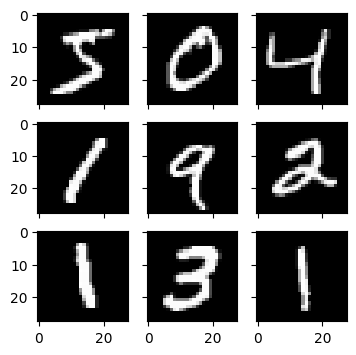

In [3]:
# loading data and plotting
from tensorflow.keras.datasets import mnist
# load dbata
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# create a grid of 3x3 images
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(X_train[i*3+j], cmap=plt.get_cmap("gray"))
# show the plot
plt.show()

In [4]:
# basic preprocessing before using ImageDataGenerator
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

### Random Rotations

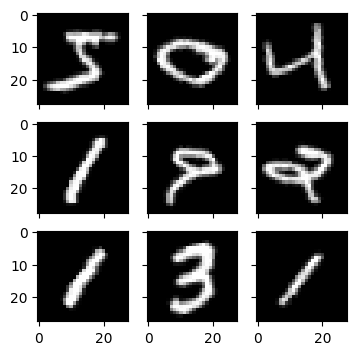

In [10]:
datagen = ImageDataGenerator(rotation_range=90)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, shuffle=False):
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j].reshape(28,28), cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()
    break

*   Images are rotated by atmost 30 degrees.

### Random Shifts

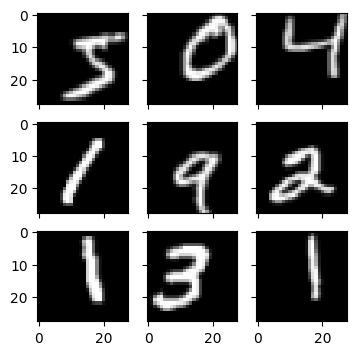

In [6]:
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, shuffle=False):
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j].reshape(28,28), cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()
    break

### Random Flips

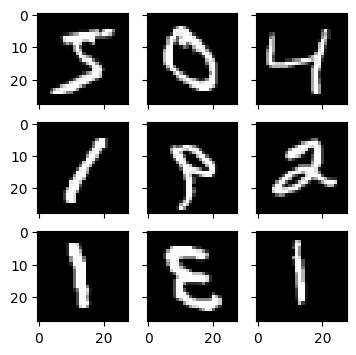

In [7]:
# define data preparation
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, shuffle=False):
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j].reshape(28,28), cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()
    break

### For saving images into directory.

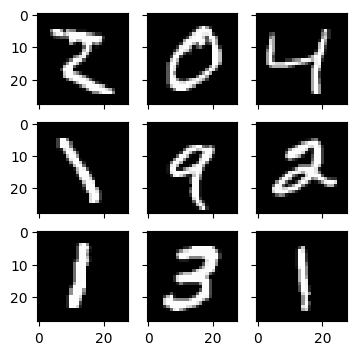

In [11]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, shuffle=False,
                                     save_to_dir='/content/images', save_prefix='augmented', save_format='png'):
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j].reshape(28,28), cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()
    break

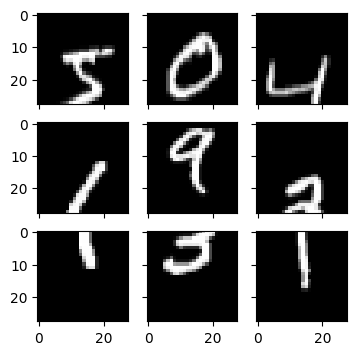

In [12]:
# general syntax
# Step 1: Make an object with opreation we want to perform as parameters
# Step 2: keep making images on the go, and keep printing it.
shift = 0.5
datagen = ImageDataGenerator(width_shift_range=shift)
for X_batch in datagen.flow(X_train, batch_size=9, shuffle=False):
  fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
  for i in range(3):
      for j in range(3):
          ax[i][j].imshow(X_batch[i*3+j].reshape(28,28), cmap=plt.get_cmap("gray"))
  # show the plot
  plt.show()
  break



*   The data generator itself is, in fact, an iterator, returning batches of image samples when requested. You can configure the batch size and prepare the data generator and get batches of images by calling the flow() function.
*   Rather than performing the operations on your entire image dataset in memory, the API is designed to be iterated by the deep learning model fitting process, creating augmented image data for you just in time. This reduces your memory overhead but adds some additional time cost during model training.

